<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Auto_Time_Series_using_Auto_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install auto-ts
!pip install tscv

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import plotly.express as px
from auto_ts import auto_timeseries

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

Imported auto_timeseries version:0.0.25. Call by using:
model = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

model.fit(traindata, ts_column,target)
model.predict(testdata, forecast_period)



In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv', index_col=0, parse_dates=True)

In [ ]:
df

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0000,46.13
2012-01-01 01:00:00,4752.1,0.0000,45.89
2012-01-01 02:00:00,4542.6,0.0000,45.04
2012-01-01 03:00:00,4357.7,0.0000,45.03
2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


In [ ]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
fig = px.line(df.reset_index(), x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d26fa80f0>,
      dtype=object)

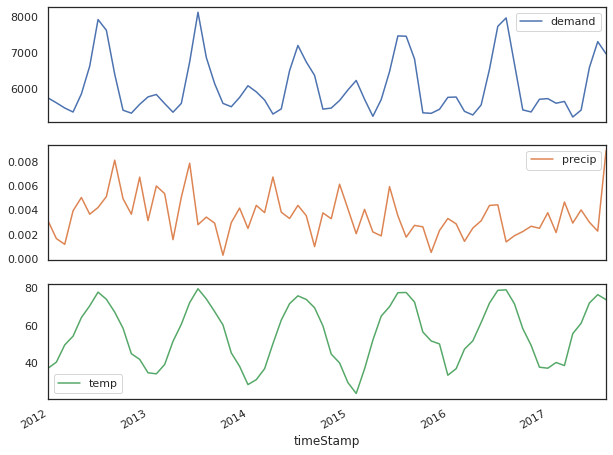

In [ ]:
df.resample('M').mean().plot(subplots=True)

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  3

Features : 
 ['demand', 'precip', 'temp']

Missing values :   demand    True
precip    True
temp      True
dtype: bool

Unique values :  
 demand    40972
precip     1004
temp       7580
dtype: int64


In [ ]:
df.query('demand != demand')

,demand,precip,temp
timeStamp,,,
2012-03-11 02:00:00,NaN,0.0000,37.78
2013-03-10 02:00:00,NaN,0.0000,38.18
2014-03-09 02:00:00,NaN,0.0000,40.86
2015-03-08 02:00:00,NaN,0.0000,36.96
2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


In [ ]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')

In [ ]:
ny_df=df.resample('M').mean().reset_index()

In [ ]:
ny_df

,timeStamp,demand,precip,temp
0,2012-01-31,5757.495833,0.003116,37.174288
1,2012-02-29,5622.331609,0.001650,40.448046
2,2012-03-31,5479.919198,0.001179,49.607917
3,2012-04-30,5368.945833,0.003959,54.255903
4,2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...,...
63,2017-04-30,5233.477382,0.002942,55.621764
64,2017-05-31,5421.773060,0.004031,61.115457
65,2017-06-30,6597.990346,0.003008,71.962625
66,2017-07-31,7306.861511,0.002272,76.380363


In [ ]:
train=ny_df[(ny_df['timeStamp'] >= '2012-01-01') & (ny_df['timeStamp'] <= '2017-04-30')]
test=ny_df[(ny_df['timeStamp'] > '2017-04-30')]

In [ ]:
train.shape

(64, 4)

In [ ]:
test.shape

(4, 4)

In [ ]:
model = auto_timeseries(score_type='rmse', time_interval='m', non_seasonal_pdq=(2,1,2), seasonality=True, model_type=['best'], verbose=2)

https://github.com/AutoViML/Auto_TS

Start of Fit.....
    Target variable given as = demand
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: timeStamp sep: , target: demand
    Dataframe loaded successfully. Shape of data set = (64, 2)
Time Interval is given as m


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(64, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
  End of Prophet Fit
NumObs: 64
NFOLDS: 3
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3


Fold Number: 1 --> Train Shape: (61, 3) Test Shape: (1, 3)
    RMSE = 654.57
    Std Deviation of Originals = nan
    Normalized RMSE = nan%
Cross Validation window: 1 completed


Fold Number: 2 --> Train Shape: (62, 3) Test Shape: (1, 3)
    RMSE = 158.09
    Std Deviation of Originals = nan
    Normalized RMSE = nan%
Cross Validation window: 2 completed


Fold Number: 3 --> Train Shape: (63, 3) Test Shape: (1, 3)
    RMSE = 

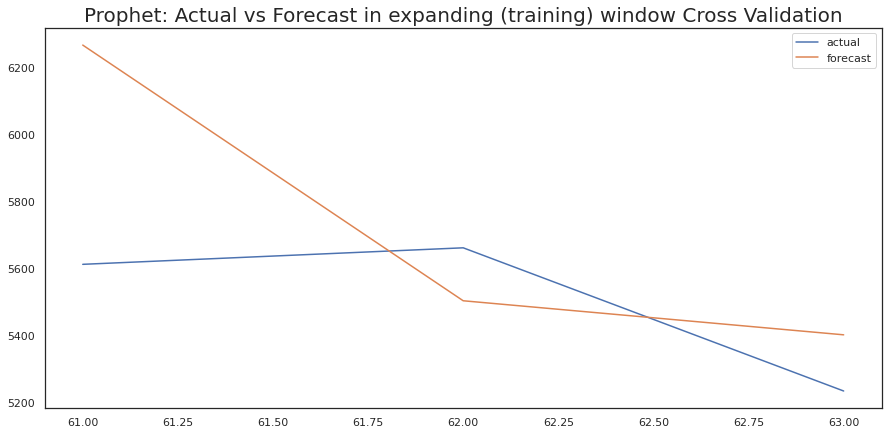

In [ ]:
model.fit(traindata=train[['timeStamp','demand','temp']], ts_column='timeStamp', target='demand', cv=3)

In [ ]:
model.get_leaderboard()

,name,rmse
3,ML,60.109806
1,auto_SARIMAX,234.865249
2,VAR,263.802933
0,Prophet,326.798858


In [ ]:
model.get_cv_scores()

,Model,CV Scores
0,Prophet,654.568740
1,Prophet,158.093089
2,Prophet,167.734744
3,auto_SARIMAX,205.284768
4,auto_SARIMAX,188.999949
5,auto_SARIMAX,310.311031
6,VAR,42.270807
7,VAR,48.179916
8,VAR,700.958077
9,ML,28.050213


In [ ]:
results_dict = model.get_ml_dict()

In [ ]:
results_dict['VAR']['forecast']

[demand             mean     mean_se  mean_ci_lower  mean_ci_upper
 2017-02-28  5569.406619  333.588286    4915.585593    6223.227645,
 demand             mean     mean_se  mean_ci_lower  mean_ci_upper
 2017-03-31  5612.797916  330.756313    4964.527455    6261.068376,
 demand             mean     mean_se  mean_ci_lower  mean_ci_upper
 2017-04-30  5934.435459  327.850366    5291.860549    6577.010369]

In [ ]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='ML')  
future_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper
timeStamp,,,,
2017-05-31,5767.380498,NaN,NaN,NaN
2017-06-30,5596.665798,NaN,NaN,NaN
2017-07-31,5460.252075,NaN,NaN,NaN
2017-08-31,5358.767350,NaN,NaN,NaN


In [ ]:
test

,timeStamp,demand,precip,temp
64,2017-05-31,5421.773060,0.004031,61.115457
65,2017-06-30,6597.990346,0.003008,71.962625
66,2017-07-31,7306.861511,0.002272,76.380363
67,2017-08-31,6711.707542,0.008961,73.730258


In [ ]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='VAR')  
future_predictions

demand,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-05-31,5412.815370,337.605375,4751.120994,6074.509747
2017-06-30,6116.354690,486.846819,5162.152459,7070.556921
2017-07-31,6757.486938,523.518833,5731.408880,7783.564996
2017-08-31,6875.337223,556.480396,5784.655688,7966.018758


In [ ]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='Prophet')  
future_predictions

Building Forecast dataframe. Forecast Period = 4


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,temp,temp_lower,temp_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-31,5987.263147,5017.438546,7227.349575,5987.263128,5987.263167,210.661619,210.661619,210.661619,210.661619,210.661619,210.661619,210.661619,210.661619,210.661619,0.0,0.0,0.0,6197.924767
1,2017-06-30,5985.602421,5348.647180,7724.062448,5985.602362,5985.602475,561.673432,561.673432,561.673432,561.673432,561.673432,561.673432,561.673432,561.673432,561.673432,0.0,0.0,0.0,6547.275853
2,2017-07-31,5983.886338,5601.971210,7865.655280,5983.886243,5983.886448,704.630394,704.630394,704.630394,704.630394,704.630394,704.630394,704.630394,704.630394,704.630394,0.0,0.0,0.0,6688.516732
3,2017-08-31,5982.170254,5512.441042,7664.819675,5982.170109,5982.170422,618.873631,618.873631,618.873631,618.873631,618.873631,618.873631,618.873631,618.873631,618.873631,0.0,0.0,0.0,6601.043885
